In [1]:
## Import parseGSEA from the parsing utility file
from parsing import parseGSEA

## parseGSEA returns a networkResults object
outputs = parseGSEA(filepath='./Example_data').fileAccessor(jaccardFilter=0.5,statThreshold=0.1)

~~~~~~ parseGSEA ~~~~~~

Retrieving data from Example_data.
EDB folder found at: Example_data\GSEA_2m/edb.
Parsing data at destinations.
Parsing: Example_data\GSEA_2m/edb
PARSED - .gmt file.
PARSED - .edb file.
PARSED - Significant genesets.
Computing Jaccard indices.


142311it [00:01, 88834.50it/s]


Parsing Complete.

~~~~~~ </parseGSEA> ~~~~~~


In [2]:
## The networkResults object is a dataclass object containing all of the information requried for downstream analysis
## The network dataframe
outputs.dataframe.head(5)

,node1,node2,jaccard_index,draw_edge,condition
0,GOCC_PRERIBOSOME,GOBP_RIBOSOME_BIOGENESIS,0.340625,0,Example_data\GSEA_2m/edb
1,GOCC_PRERIBOSOME,REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAININ...,0.002625,0,Example_data\GSEA_2m/edb
2,GOCC_PRERIBOSOME,GOBP_RIBOSOMAL_LARGE_SUBUNIT_BIOGENESIS,0.126506,0,Example_data\GSEA_2m/edb
3,GOCC_PRERIBOSOME,REACTOME_MRNA_SPLICING,0.003195,0,Example_data\GSEA_2m/edb
4,GOCC_PRERIBOSOME,GOCC_SMALL_SUBUNIT_PROCESSOME,0.669643,1,Example_data\GSEA_2m/edb


In [3]:
## The network metadata
outputs.metadata.head(5) 

,node,nes,fdr,upregulated?,condition
0,GOCC_PRERIBOSOME,-2.3769,0.0000,0,Example_data\GSEA_2m/edb
1,GOBP_RIBOSOME_BIOGENESIS,-2.1993,0.0064,0,Example_data\GSEA_2m/edb
2,REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAININ...,-2.1959,0.0051,0,Example_data\GSEA_2m/edb
3,GOBP_RIBOSOMAL_LARGE_SUBUNIT_BIOGENESIS,-2.1434,0.0113,0,Example_data\GSEA_2m/edb
4,REACTOME_MRNA_SPLICING,-2.1407,0.0094,0,Example_data\GSEA_2m/edb


In [4]:
## The user-selected filters (Jaccard and statistical threshold)
outputs.filters 

{'jaccardFilter': 0.5, 'statThreshold': 0.1}

In [5]:
## The normalised enrichments and false discovery rates for genesets in this experiment
outputs.statistics[:5]

[('GOCC_PRERIBOSOME', -2.3769, 0.0, 'Example_data\\GSEA_2m/edb'),
 ('GOBP_RIBOSOME_BIOGENESIS', -2.1993, 0.0064, 'Example_data\\GSEA_2m/edb'),
 ('REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA',
  -2.1959,
  0.0051,
  'Example_data\\GSEA_2m/edb'),
 ('GOBP_RIBOSOMAL_LARGE_SUBUNIT_BIOGENESIS',
  -2.1434,
  0.0113,
  'Example_data\\GSEA_2m/edb'),
 ('REACTOME_MRNA_SPLICING', -2.1407, 0.0094, 'Example_data\\GSEA_2m/edb')]

In [6]:
## The gene lookup tables for each of the genesets
import pandas as pd
pd.Series(outputs.lookup).head(5)


GOCC_PRERIBOSOME                                            [2810004N23Rik, Aatf, Bms1, Bop1, Bysl, Casp8,...
GOBP_RIBOSOME_BIOGENESIS                                    [1700009N14Rik, 2810004N23Rik, 9930104L06Rik, ...
REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA    [Aaas, Acin1, Alyref, Aqr, BC005624, Bcas2, Bu...
GOBP_RIBOSOMAL_LARGE_SUBUNIT_BIOGENESIS                     [9930104L06Rik, Bop1, Brix1, Cinp, Ddx18, Ddx2...
REACTOME_MRNA_SPLICING                                      [Acin1, Alyref, Aqr, BC005624, Bcas2, Bud13, B...
dtype: object

~~~~~~ parseGSEA ~~~~~~

Retrieving data from Example_data.
EDB folder found at: Example_data\GSEA_2m/edb.
Parsing data at destinations.
Parsing: Example_data\GSEA_2m/edb
PARSED - .gmt file.
PARSED - .edb file.
PARSED - Significant genesets.
Computing Jaccard indices.


142311it [00:01, 90647.90it/s]


Parsing Complete.

~~~~~~ </parseGSEA> ~~~~~~


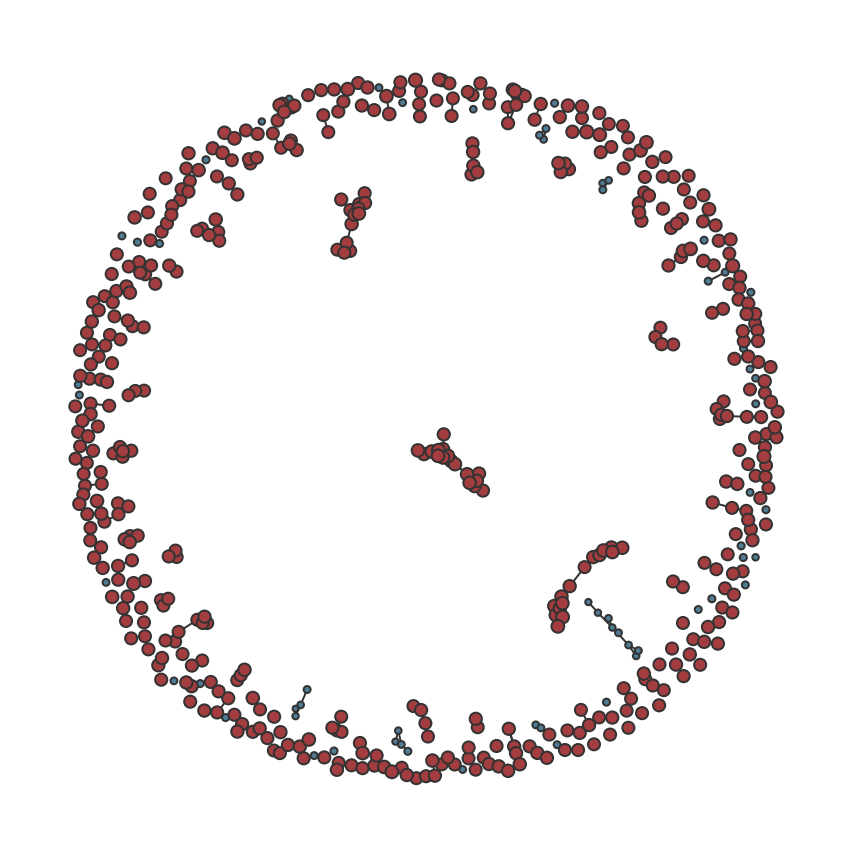

In [7]:
## networkResults objects can be passed to plotGSEA for plotting the network graph
from parsing import parseGSEA
from plotting import plotGSEA

outputs = parseGSEA(filepath='./Example_data').fileAccessor(jaccardFilter=0.45,statThreshold=0.1)
plotGSEA.iterativePlotting(outputs,save=False)

In [ ]:
## networkResults objects can also be passed to the analyseGSEA() function to extract information from the subgraphs in the network
from parsing import parseGSEA
from analysis import analyseGSEA

outputs = parseGSEA(filepath='./Example_data').fileAccessor(jaccardFilter=0.45,statThreshold=0.1)

## This returns an analysisResults objects containing four accessible elements
results = analyseGSEA().clusterInformation(outputs,clustersize=4)

~~~~~~ parseGSEA ~~~~~~

Retrieving data from Example_data.
EDB folder found at: Example_data\GSEA_2m/edb.
Parsing data at destinations.
Parsing: Example_data\GSEA_2m/edb
PARSED - .gmt file.
PARSED - .edb file.
PARSED - Significant genesets.
Computing Jaccard indices.


142311it [00:01, 89113.08it/s]


Parsing Complete.

~~~~~~ </parseGSEA> ~~~~~~
~~~~~~ analyseGSEA ~~~~~~

Creating instance of graph network.
Evaluating subgraphs.
Accessing subgraph constituents.
Performing extractive summarisation of geneset annotations.
Calculating mean normalised enrichment scores.
Analysis complete.

~~~~~~ </analyseGSEA> ~~~~~~


In [ ]:
## The contents of the analysisResults object are as follows:
import pandas as pd 
print('Semantic enrichment:\n',pd.Series(results.enrichment).head(5),'\n')
print('Cluster geneset composition:\n',pd.Series(results.clusters).head(5),'\n')
print('Cluster average normalised enrichment score:\n',pd.Series(results.clusterNES).head(5),'\n')

Semantic enrichment:
 2     {'PROCESSING': 44.5, 'OF': 0.45408163265306123...
44    {'NADH': 89.0, 'DEHYDROGENASE': 29.66666666666...
68    {'VIRAL': 26.7, 'PROCESS': 4.271999999999999, ...
80    {'MITOTIC': 14.239999999999998, 'CELL': 12.714...
82    {'AMPLIFICATION': 41.07692307692307, 'OF': 1.3...
dtype: object 

Cluster geneset composition:
 2     {REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINI...
44    {GOCC_NADH_DEHYDROGENASE_COMPLEX, GOBP_PROTON_...
68    {GOBP_VIRAL_PROCESS, GOBP_NEGATIVE_REGULATION_...
80    {GOBP_MITOTIC_CELL_CYCLE_PHASE_TRANSITION, GOB...
82    {REACTOME_AMPLIFICATION_OF_SIGNAL_FROM_THE_KIN...
dtype: object 

Cluster average normalised enrichment score:
 2    -2.037037
44    1.748983
68    2.102373
80    1.721867
82    1.884723
dtype: float64 

